In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd


In [18]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
transformer.transform(12, 12)

(1335833.8895192828, 1345708.4084091089)

C:\Users\JD278300\AppData\Local\Temp\ipykernel_6860\1805921577.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\JD278300\AppData\Local\Temp\ipykernel_6860\1805921577.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  usa_states['centroid'] = usa_states['geometry'].centroid
C:\Users\JD278300\AppData\Local\Temp\ipykernel_6860\1805921577.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  china_states['centroid'] = china_states['geometry'].centroid
C:\Users\

    FID          Program state_code            State_Name Flowing_St  FID_1  \
0     1  PERMIT TRACKING         AL               ALABAMA          F    919   
1     2             None         AK                ALASKA          N    920   
2     3          AZURITE         AZ               ARIZONA          F    921   
3     4              PDS         AR              ARKANSAS          F    922   
4     5             None         CA            CALIFORNIA          N    923   
5     6           ECOMAP         CO              COLORADO          F    924   
6     7             SIMS         CT           CONNECTICUT          F    925   
7     8             None         DE              DELAWARE          P    926   
8     9             None         DC  DISTRICT OF COLUMBIA          P    927   
9    10             None         FL               FLORIDA          P    928   
10   11             None         GA               GEORGIA          N    929   
11   12           HI-EHW         HI                H

C:\Users\JD278300\AppData\Local\Temp\ipykernel_6860\1805921577.py:73: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = world.centroid
s:\131-DPE\131.1-Temporaire\131.1.1-Espace commun\zone transfert temporaire\ITESE Grenoble\Stage Justine\Code git\wavelet_decomposition\.conda\lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


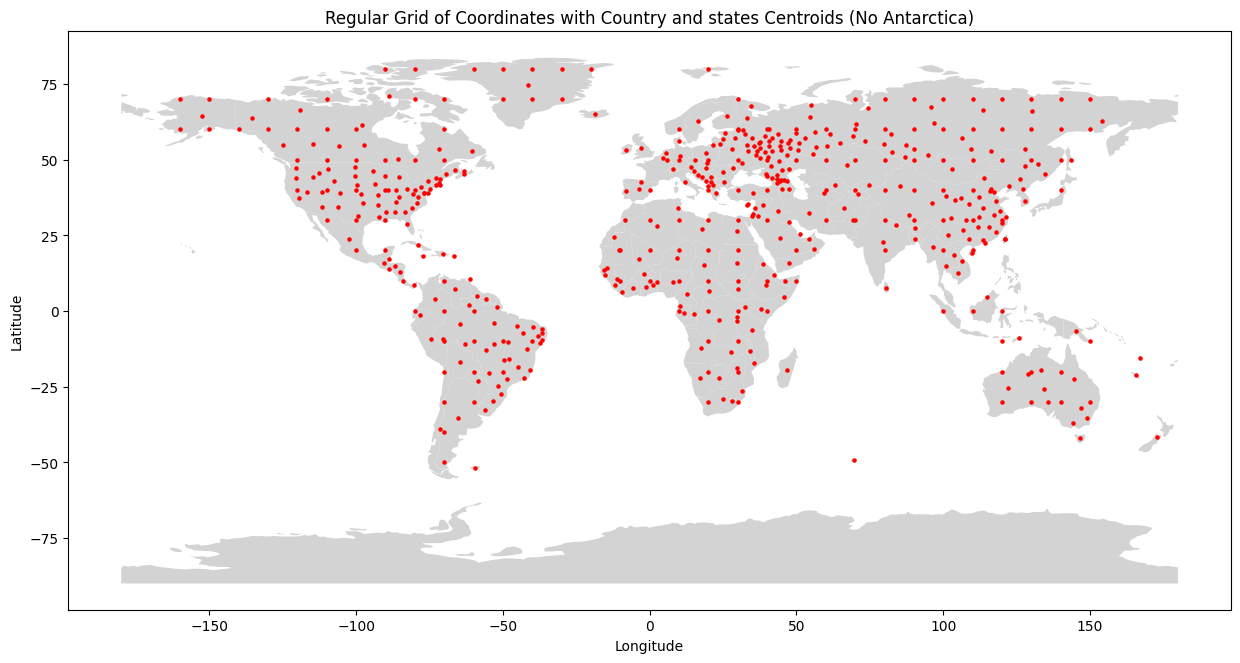

In [60]:
# Charger les données de la carte du monde
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


usa_states = gpd.read_file('shapefiles/USA/States_shapefile.shp')
china_states = gpd.read_file('shapefiles/China/chn_admbnda_adm1_ocha_2020.shp')
russia_states = gpd.read_file('shapefiles/Russia/geoBoundaries-RUS-ADM1.shp')
brazil_states = gpd.read_file('shapefiles/Brazil/geoBoundaries-BRA-ADM1.shp')
australia_states = gpd.read_file('shapefiles/Australia/georef-australia-state-millesime.shp')
canada_states = gpd.read_file('shapefiles/Canada/Canada_Provincial_boundaries_generalized.shp')
india_states = gpd.read_file('shapefiles/India/India_State_Boundary.shp')
india_states = india_states.to_crs(world.crs)
canada_states = canada_states.to_crs(world.crs)
# Calculer les barycentres des états
usa_states['centroid'] = usa_states['geometry'].centroid
china_states['centroid'] = china_states['geometry'].centroid
russia_states['centroid'] = russia_states['geometry'].centroid
india_states['centroid'] = india_states['geometry'].centroid
australia_states['centroid'] = australia_states['geometry'].centroid
canada_states['centroid'] = canada_states['geometry'].centroid
brazil_states['centroid'] = brazil_states['geometry'].centroid

# Renommer colonnes qui contiennent les codes
canada_states = canada_states.rename(columns={'postal':'state_code'})
australia_states = australia_states.rename(columns={'ste_iso3166':'state_code'})
usa_states = usa_states.rename(columns={'State_Code':'state_code'})
russia_states = russia_states.rename(columns={'shapeISO':'state_code'})
brazil_states = brazil_states.rename(columns={'shapeISO':'state_code'})
china_states = china_states.rename(columns={'ADM1_PCODE':'state_code'})
print(usa_states)
# Créer un GeoDataFrame pour les barycentres des états des États-Unis
us_centroids_df = gpd.GeoDataFrame({
    'geometry': usa_states['centroid'],
    'state_code': usa_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
china_centroids_df = gpd.GeoDataFrame({
    'geometry': china_states['centroid'],
    'state_code': china_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
russia_centroids_df = gpd.GeoDataFrame({
    'geometry': russia_states['centroid'],
    'state_code': russia_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
# india_centroids_df = gpd.GeoDataFrame({
#     'geometry': usa_states['centroid'],
#     'state_code': usa_states['state_code']  # Assuming 'state_code' is the column name in usa_states
# }, crs=world.crs)
australia_centroids_df = gpd.GeoDataFrame({
    'geometry': australia_states['centroid'],
    'state_code': australia_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
canada_centroids_df = gpd.GeoDataFrame({
    'geometry': canada_states['centroid'],
    'state_code': canada_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
brazil_centroids_df = gpd.GeoDataFrame({
    'geometry': brazil_states['centroid'],
    'state_code': brazil_states['state_code']  # Assuming 'state_code' is the column name in usa_states
}, crs=world.crs)
# Définir les limites de la grille
min_lon, min_lat, max_lon, max_lat = -180, -90, 180, 90
grid_spacing = 10  # espacement de 10 degrés

# Générer les points de la grille
lons = np.arange(min_lon, max_lon, grid_spacing)
lats = np.arange(min_lat, max_lat, grid_spacing)
grid_points = [Point(lon, lat) for lon in lons for lat in lats]

# Créer un GeoDataFrame pour les points de la grille
grid_df = gpd.GeoDataFrame(geometry=grid_points, crs=world.crs)

# Extraire les centroïdes des pays
centroids = world.centroid
centroids_df = gpd.GeoDataFrame(geometry=centroids, crs=world.crs)

# Fusionner les points de la grille, les centroïdes, et les barycentres des états des États-Unis
all_points = pd.concat([grid_df, centroids_df, us_centroids_df, russia_centroids_df, china_centroids_df, australia_centroids_df,canada_centroids_df, brazil_centroids_df ], ignore_index=True)

# Filtrer les points pour enlever ceux situés en Antarctique
all_points['latitude'] = all_points.geometry.apply(lambda p: p.y)
all_points = all_points[all_points['latitude'] > -60]

# Vérifier quels points sont dans les frontières des pays
points_in_world = gpd.sjoin(all_points, world, op='within', how='inner')

# Sauvegarder la grille pour future utilisation
output_path = './grid_with_centroids_states.geojson'
points_in_world.to_file(output_path, driver='GeoJSON')

# Visualiser la grille et les centroïdes sur la carte du monde
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
points_in_world.plot(ax=ax, color='red', markersize=5)

plt.title('Regular Grid of Coordinates with Country and states Centroids (No Antarctica)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [62]:
points_in_world

,geometry,state_code,latitude,index_right,pop_est,continent,name,iso_a3,gdp_md_est
51,POINT (-160.00000 60.00000),NaN,60.000000,4,328239523.0,North America,United States of America,USA,21433226
52,POINT (-160.00000 70.00000),NaN,70.000000,4,328239523.0,North America,United States of America,USA,21433226
69,POINT (-150.00000 60.00000),NaN,60.000000,4,328239523.0,North America,United States of America,USA,21433226
70,POINT (-150.00000 70.00000),NaN,70.000000,4,328239523.0,North America,United States of America,USA,21433226
87,POINT (-140.00000 60.00000),NaN,60.000000,4,328239523.0,North America,United States of America,USA,21433226
...,...,...,...,...,...,...,...,...,...
1037,POINT (-42.73539 -22.26262),BR-RJ,-22.262623,29,211049527.0,South America,Brazil,BRA,1839758
1038,POINT (-48.75822 -22.31330),BR-SP,-22.313296,29,211049527.0,South America,Brazil,BRA,1839758
1039,POINT (-51.65603 -24.68382),BR-PR,-24.683821,29,211049527.0,South America,Brazil,BRA,1839758
1040,POINT (-50.51684 -27.29926),BR-SC,-27.299260,29,211049527.0,South America,Brazil,BRA,1839758
